# Scikit-Learn Workflow and Project Definition

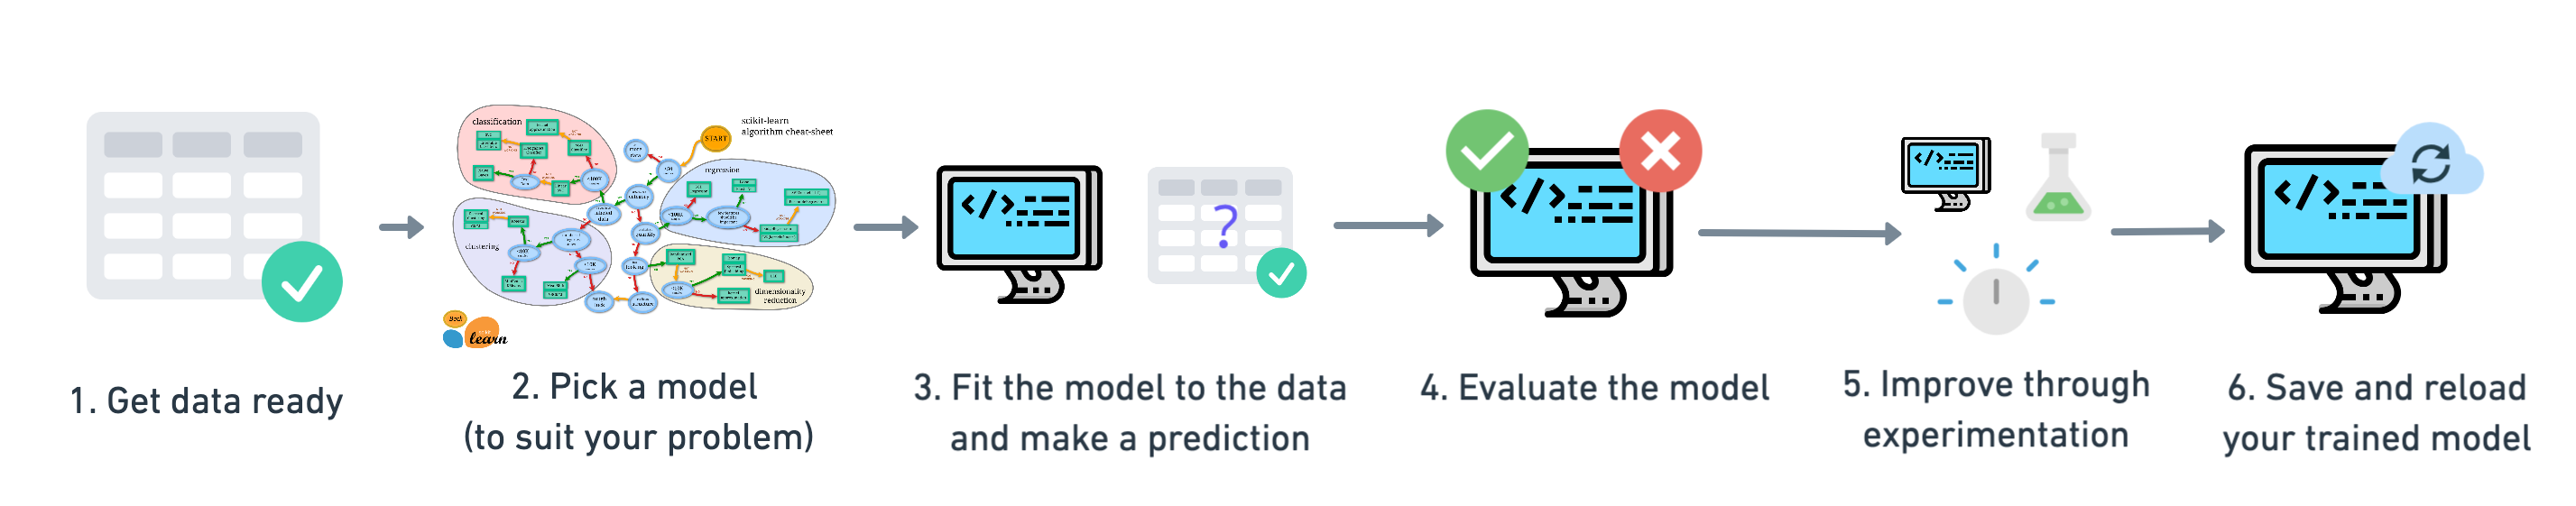

**predicting the price of bulldozers using Machine Learning**

[Download Dataset
](https://drive.google.com/file/d/1U6M-EzY6DXB9Boc5Asuuh_o-uSLvh6CE/view?usp=sharing
)

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.


The key fields are in train.csv are:

saleprice: what the machine sold for at auction (only provided in train.csv)

saledate: the date of the sale

# 0.Creating the environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# 1.Getting data ready

1. split the data into features and labels
2. filling or imputing the missing values
3. converting strings to numerical values

##Checking the data

In [ ]:
#importing the data
df = pd.read_csv("/content/drive/MyDrive/PricePredictionBulldozer/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

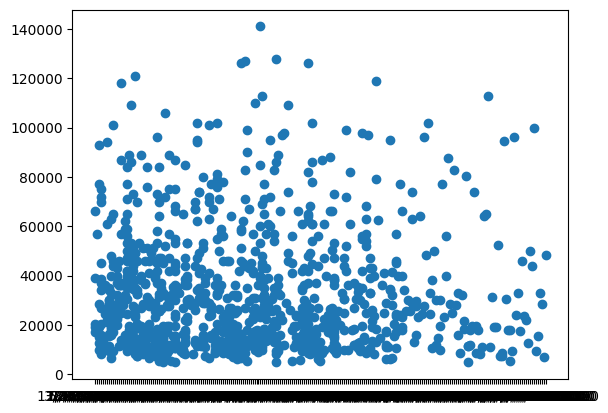

In [ ]:
#plotting sales price vs sales date
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

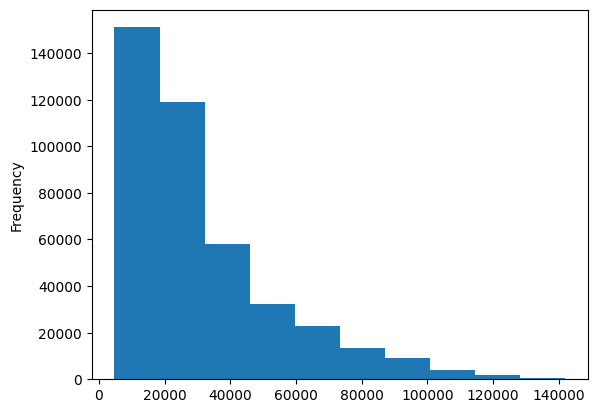

In [ ]:
df.SalePrice.plot.hist()

## Parsing dates

working with time series data, the goal is to enrich the time and sate component as much as possible.

pandas transfer date into a datetime object with pasrse_dates parameter

In [ ]:
df_date = pd.read_csv("/content/drive/MyDrive/PricePredictionBulldozer/TrainAndValid.csv",
                      low_memory=False,
                      parse_dates= ["saledate"])
df_date.saledate.dtype

dtype('<M8[ns]')

In [ ]:
df_date["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

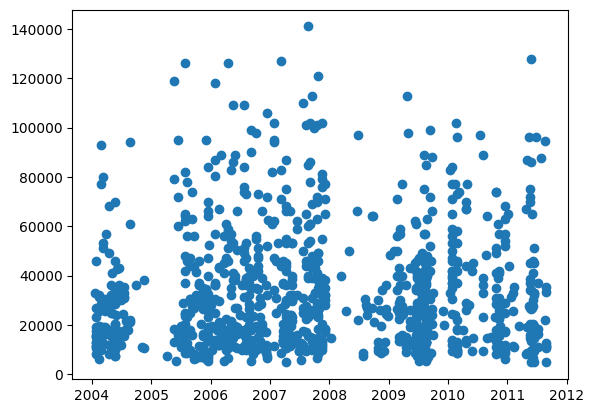

In [ ]:
#plotting sales price vs sales date
fig, ax=plt.subplots()
ax.scatter(df_date["saledate"][:1000], df_date["SalePrice"][:1000])

In [ ]:
df_date.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df2 = pd.DataFrame (df_date["SalePrice"][:1000])
df2["saledate"] = df_date.saledate[:1000]
df2

,SalePrice,saledate
0,66000.0,2006-11-16
1,57000.0,2004-03-26
2,10000.0,2004-02-26
3,38500.0,2011-05-19
4,11000.0,2009-07-23
...,...,...
995,33000.0,2009-07-16
996,62000.0,2007-06-14
997,8000.0,2005-09-22
998,16000.0,2005-07-28


## Sorting DataFrame by saledate

In [ ]:
df_date.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_date.sort_values(by=["saledate"], inplace= True, ascending=True)
df_date.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
#saving the current state of df_date
df_tmp = df_date.copy()

##Adding datetime parameter for saledate column

In [ ]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.drop("saledate", axis=1, inplace=True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [ ]:
len(df_tmp)

412698

In [ ]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Using pandas categories to convert non numeric datas

In [ ]:
pd.api.types.is_string_dtype(df_tmp["Grouser_Type"])

True

In [ ]:
# getting the data types of labels
for label, cell in df_tmp.items():
  if(pd.api.types.is_string_dtype(cell)):
    print(f"STR: {label}")
  else:
     print(f"INT: {label}")

INT: SalesID
INT: SalePrice
INT: MachineID
INT: ModelID
INT: datasource
INT: auctioneerID
INT: YearMade
INT: MachineHoursCurrentMeter
STR: UsageBand
STR: fiModelDesc
STR: fiBaseModel
STR: fiSecondaryDesc
STR: fiModelSeries
STR: fiModelDescriptor
STR: ProductSize
STR: fiProductClassDesc
STR: state
STR: ProductGroup
STR: ProductGroupDesc
STR: Drive_System
STR: Enclosure
STR: Forks
STR: Pad_Type
STR: Ride_Control
STR: Stick
STR: Transmission
STR: Turbocharged
STR: Blade_Extension
STR: Blade_Width
STR: Enclosure_Type
STR: Engine_Horsepower
STR: Hydraulics
STR: Pushblock
STR: Ripper
STR: Scarifier
STR: Tip_Control
STR: Tire_Size
STR: Coupler
STR: Coupler_System
STR: Grouser_Tracks
STR: Hydraulics_Flow
STR: Track_Type
STR: Undercarriage_Pad_Width
STR: Stick_Length
STR: Thumb
STR: Pattern_Changer
STR: Grouser_Type
STR: Backhoe_Mounting
STR: Blade_Type
STR: Travel_Controls
STR: Differential_Type
STR: Steering_Controls
INT: saleYear
INT: saleMonth
INT: saleDay
INT: saleDayOfWeek
INT: saleDayOfY

In [ ]:
#converting non numeric datas to catrgory
for label, cell in df_tmp.items():
  if(pd.api.types.is_string_dtype(cell)):
    df_tmp[label] = cell.astype("category").cat.as_ordered()

In [ ]:
#checking data types for any missing nun numeric col
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
print(df_tmp.state.value_counts())
print(df_tmp.state.cat.categories)
print(df_tmp.state.cat.codes)

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Handlling missing numeric datas

In [ ]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [ ]:
#making a copy of  data frame to save the progress
df_missing_handler = df_tmp.copy()

In [ ]:
for label, cell in df_missing_handler.items():
  if(pd.api.types.is_numeric_dtype(cell)):
    if pd.isnull(cell).sum():
      print(f"missing numric: {label}")
      df_missing_handler[label] = cell.fillna(cell.median)

missing numric: auctioneerID
missing numric: MachineHoursCurrentMeter


In [ ]:
for label, cell in df_missing_handler.items():
    if(pd.api.types.is_numeric_dtype(cell)):
      if pd.isnull(cell).sum():
        #adding a boolean column that indicates the missing data
        df_missing_handler[label+"_is_missing"] = pd.isnull(cell)
        #filling missing values with the median
        df_missing_handler[label] = cell.fillna(cell.median())

In [ ]:
df_missing_handler.isnull().sum()/len(df_missing_handler) *100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 0.000000
YearMade                     0.000000
MachineHoursCurrentMeter     0.000000
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

## Handlling missing category datas
* Handling missing categorical cells transfer them to numbers.
* Missing values in pandas categories are assigned -1 so by adding 1 to it missing values become 0 and sepperately classified.

In [ ]:
for label, cell in df_missing_handler.items():
  if not (pd.api.types.is_numeric_dtype(cell)):
    if pd.isnull(cell).sum():
      print(f"missing numric: {label}")

missing numric: UsageBand
missing numric: fiSecondaryDesc
missing numric: fiModelSeries
missing numric: fiModelDescriptor
missing numric: ProductSize
missing numric: Drive_System
missing numric: Enclosure
missing numric: Forks
missing numric: Pad_Type
missing numric: Ride_Control
missing numric: Stick
missing numric: Transmission
missing numric: Turbocharged
missing numric: Blade_Extension
missing numric: Blade_Width
missing numric: Enclosure_Type
missing numric: Engine_Horsepower
missing numric: Hydraulics
missing numric: Pushblock
missing numric: Ripper
missing numric: Scarifier
missing numric: Tip_Control
missing numric: Tire_Size
missing numric: Coupler
missing numric: Coupler_System
missing numric: Grouser_Tracks
missing numric: Hydraulics_Flow
missing numric: Track_Type
missing numric: Undercarriage_Pad_Width
missing numric: Stick_Length
missing numric: Thumb
missing numric: Pattern_Changer
missing numric: Grouser_Type
missing numric: Backhoe_Mounting
missing numric: Blade_Type
m

In [ ]:
print(pd.Categorical(df_missing_handler["state"]).codes )

[43  8  8 ...  4  4  4]


In [ ]:
#handlling missing categorical values
for label, cell in df_missing_handler.items():
  if not (pd.api.types.is_numeric_dtype(cell)):
      #adding a boolean column that indicates the missing data
      df_missing_handler[label+"_is_missing"] = pd.isnull(cell)
      #turning categories into numbers and adding 1 to it so : missing categorical values => 0
      df_missing_handler[label] = pd.Categorical(cell).codes + 1

In [ ]:
print(df_missing_handler.isnull().sum())

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64


# 2.Choosing the right algorithm for the problem


In [ ]:
%%time
#2012 data is validation set and the the data for before 2012(rest of the data) is the training set
#sepperating training and validation dataset
val_df = df_missing_handler[df_missing_handler.saleYear == 2012]
train_df = df_missing_handler[df_missing_handler.saleYear != 2012]
#sepperating feature and label for training
X_train, Y_train = train_df.drop("SalePrice", axis = 1), train_df["SalePrice"]
X_val, Y_val = val_df.drop("SalePrice", axis = 1), val_df["SalePrice"]
#importing the model
from sklearn.ensemble import RandomForestRegressor
initial_model = RandomForestRegressor( n_jobs=-1, random_state = 42)
#fitting the train data to the model
initial_model.fit (X_train , Y_train )
#testing the score of the model on the training data to make sure the model undrestands the training data
print(f"train:  {initial_model.score(X_train , Y_train)}")
#testing the score of the model on validation dataset
print(f"validation:  {initial_model.score(X_val , Y_val)}")


train:  0.9874420121174903
validation:  0.8715306860412466
CPU times: user 17min 15s, sys: 2.55 s, total: 17min 18s
Wall time: 2min 19s


# 3.Fitting the data to the model

## Creating a function to process test and validation data in isolation

In [ ]:
def data_transform(DataFrame) :
  #Add datetime parameter and dropping saledatecolumn
  DataFrame["saleYear"] = DataFrame.saledate.dt.year
  DataFrame["saleMonth"] = DataFrame.saledate.dt.month
  DataFrame["saleDay"] = DataFrame.saledate.dt.day
  DataFrame["saleDayOfWeek"] = DataFrame.saledate.dt.dayofweek
  DataFrame["saleDayOfYear"] = DataFrame.saledate.dt.dayofyear
  DataFrame.drop("saledate", axis=1, inplace=True)
  # handling missing numeric data
  for label, cell in DataFrame.items():
      if(pd.api.types.is_numeric_dtype(cell)):
        if pd.isnull(cell).sum():
          #filling missing values with the median
          DataFrame[label] = cell.fillna(cell.median())
  #converting non numeric datas to catrgory
  for label, cell in DataFrame.items():
    if(pd.api.types.is_string_dtype(cell)):
      DataFrame[label] = cell.astype("category").cat.as_ordered()
  # handling missing category data and converting categories to number
  for label, cell in DataFrame.items():
    if not (pd.api.types.is_numeric_dtype(cell)):
      #turning categories into numbers and adding 1 to it so : missing categorical values => 0
      DataFrame[label] = pd.Categorical(cell).codes + 1
  #returning the transformed dataframe

  return(DataFrame)

## Reloading the isolated test and validation datas

In [ ]:
#loading the data frame
train_val_df = pd.read_csv("/content/drive/MyDrive/PricePredictionBulldozer/TrainAndValid.csv",
                      low_memory=False,
                      parse_dates= ["saledate"])
#transforming the data
train_val_df = data_transform(train_val_df)
#sepperating training and validation data
val_df = train_val_df[train_val_df.saleYear == 2012]
train_df = train_val_df[train_val_df.saleYear != 2012]
#sepperating features and labels for training and validation
X_train, Y_train = train_df.drop("SalePrice", axis = 1), train_df["SalePrice"]
X_val, Y_val = val_df.drop("SalePrice", axis = 1), val_df["SalePrice"]

## Training the new model with isolated data

In [ ]:
#importing the model
from sklearn.ensemble import RandomForestRegressor
isolated_model = RandomForestRegressor( n_jobs=-1, random_state = 42)
#fitting the train data to the model
isolated_model.fit (X_train , Y_train )
#testing the score of the model on the training data to make sure the model undrestands the training data
print(f"train:  {isolated_model.score(X_train , Y_train)}")
#testing the score of the model on validation dataset
print(f"validation:  {isolated_model.score(X_val , Y_val)}")

train:  0.9875391163336182
validation:  0.8732154888392129


# 4.Evaluating the Trained model

## Creating a function for the evaluation

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {"Training MAE" : mean_absolute_error(Y_train, train_preds ),
            "Valid MAE" : mean_absolute_error(Y_val, val_preds),
            "Training RMSLE" :rmsle(Y_train, train_preds ),
            "valid RMSLE" :rmsle(Y_val, val_preds ),
            "Train R^2" : r2_score(Y_train, train_preds ),
            "Valid R^2": r2_score(Y_val, val_preds )
            }
  return scores

In [ ]:
show_scores(isolated_model)

{'Training MAE': 1576.8765817637893,
 'Valid MAE': 6114.244233128835,
 'Training RMSLE': 0.08409787243417824,
 'valid RMSLE': 0.2537731224693551,
 'Train R^2': 0.9875391163336182,
 'Valid R^2': 0.8732154888392129}

# 5.Improving the model

## Testing the model on a subset to reduce training time

In [ ]:
%%time
boosting_model = RandomForestRegressor( n_jobs = -1 ,
                                        random_state = 42 ,
                                        max_samples = 20000)
#fitting the train data to the model to adjust the time and score
boosting_model.fit (X_train , Y_train )
show_scores(boosting_model)

CPU times: user 1min 2s, sys: 253 ms, total: 1min 2s
Wall time: 8.8 s


{'Training MAE': 5043.974969124338,
 'Valid MAE': 6791.121919122094,
 'Training RMSLE': 0.23669855187209796,
 'valid RMSLE': 0.2788750577498382,
 'Train R^2': 0.8833554543865816,
 'Valid R^2': 0.8490539959239861}

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators" : np.arange(10,100,10),
        "max_depth" : [None, 3, 5, 10, 20],
        "max_features" : ["sqrt", "auto" , 0.5, 1],
        "min_samples_split" : np.arange(2,20,2),
        "min_samples_leaf" : np.arange(1,20,2),
        "max_samples" : [20000]}
rs_model = RandomizedSearchCV(estimator = boosting_model,
                              param_distributions = grid,
                              n_iter = 200,
                              cv = 3,
                              verbose=2,
                              n_jobs = -1,
                              random_state = 42)
#n_iter=> number of models to try
#cv = cross validation num
#fitting data to new model
rs_model.fit(X_train, Y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
CPU times: user 26.5 s, sys: 2.45 s, total: 28.9 s
Wall time: 9min 58s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_samples=20000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': ['sqrt', 'auto', 0.5,
                                                         1],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=2)

In [ ]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
show_scores(rs_model)

{'Training MAE': 5497.275937270304,
 'Valid MAE': 6942.5294344249705,
 'Training RMSLE': 0.2534207320622931,
 'valid RMSLE': 0.2828916092717967,
 'Train R^2': 0.8625692509635687,
 'Valid R^2': 0.8410081164184212}

## Training a model with best hyperparameters

In [ ]:
%%time
best_model = RandomForestRegressor( n_estimators = 70,
                                        min_samples_split = 8,
                                        min_samples_leaf = 1,
                                        max_features = 0.5,
                                        max_depth = 20)
best_model.fit (X_train , Y_train )
show_scores(best_model)

CPU times: user 2min 27s, sys: 331 ms, total: 2min 28s
Wall time: 2min 27s


{'Training MAE': 3124.1462361782087,
 'Valid MAE': 5938.054533272168,
 'Training RMSLE': 0.15427402167636914,
 'valid RMSLE': 0.2455214979107471,
 'Train R^2': 0.9566290383940994,
 'Valid R^2': 0.8822484988093003}

## feature importance


In [ ]:
#finding feature importance of best_model
best_model.feature_importances_

array([0.03470925, 0.02106267, 0.04264184, 0.00213456, 0.00322985,
       0.19649092, 0.00346612, 0.00133185, 0.04423968, 0.04157185,
       0.07032134, 0.00530135, 0.0243734 , 0.15980981, 0.053172  ,
       0.00572278, 0.00572066, 0.00534071, 0.00325576, 0.07009397,
       0.00106529, 0.00055302, 0.00133389, 0.00020988, 0.00155492,
       0.00050557, 0.00511784, 0.00879626, 0.0045854 , 0.0026657 ,
       0.00835053, 0.00416614, 0.00528907, 0.00122751, 0.00198004,
       0.01131952, 0.00132044, 0.01759647, 0.0123572 , 0.00918496,
       0.00166627, 0.00087271, 0.00175646, 0.00066717, 0.00040769,
       0.00036423, 0.00052882, 0.00403624, 0.00106097, 0.00034719,
       0.00027107, 0.07311862, 0.00388196, 0.00554303, 0.00291623,
       0.00939133])

In [ ]:
def plot_importance(columns, importances, n=20):
  df = (pd.DataFrame({"features" : columns,
                      "feature_importances" : importances})
        .sort_values("feature_importances" , ascending = False)
        .reset_index(drop = True))
  #plotting DF
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature importance")

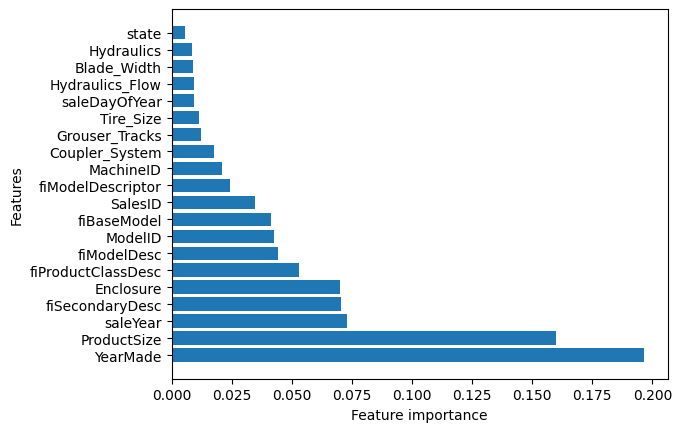

In [ ]:
plot_importance(X_train.columns, best_model.feature_importances_)

It can be concluded that the main factors in determining the price of bulldozers are the YearMade and ProductSize.

# 6.Saving and loading models

In [ ]:
from joblib import dump, load
#saving a model
dump(best_model, "/content/drive/MyDrive/PricePredictionBulldozer/best_model.joblib")

['/content/drive/MyDrive/PricePredictionBulldozer/best_model.joblib']

In [ ]:
#loading the model
loaded_joblib_obj = load(filename = "/content/drive/MyDrive/PricePredictionBulldozer/best_model.joblib")